# Baseline Titanic challenge Solution

### Data Description
The titanic challenge is a challenge on the predominant titanic event that took place years ago at ..... where we had alot of people on a ship. Unfortunately, the ship collided with an iceberg which led to the sinking of the ship and loss of so many lives. 
This challenge is therefore put forth from the details gotten regarding people on the ship who survived and those who didnt. The challenge is all about you (the data scienctist)  build a predictive model which is able to determine peoples survival. 
### The Data Set
The data set is avaliable on kaggle and can be accessed using the link below:
https://www.kaggle.com/c/titanic

### Data description
    from the dataset we do have the following information stated regarding each fellow on the ship:
    *passenger_id
    *pclass
    *name
    *sex
    *age
    *sibsp
    *parch
    *ticket
    *fare
    *cabin
    *embarked
    *boat
    *body
    *home.dest
  
    
the bone of contention is to forecast the survival of a person given the details above.

    Survival in this case can be represented in binary:
    *one (1) means 'will survive'.
    *zero (0) means 'will not survive'.
    
Let's get to coding. Let's begin by importing the necessary libaries that are relevant to modelling this problem and solving it.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
os.getcwd()

'/home/odemakinde/Desktop/my write ups'

let's read in the data using pandas method called read_csv for reading in, csv files.

In [2]:
train = pd.read_csv('/home/odemakinde/Desktop/my write ups/titanic/train.csv')

test= pd.read_csv('/home/odemakinde/Desktop/my write ups/titanic/test.csv')
train.shape, test.shape

((891, 12), (418, 11))

let's take a look at the first 5 entries of our data just to have grasp of how our data looks like.

In [3]:
data = train.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the dimension of the data we have

In [4]:
# to know the dimension of my data
data.shape

(891, 12)

# filling NAN, an removing rough columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data = data.drop(['Cabin'], axis = 1)
#test_data = data.drop(['cabin'], axis = 1)

In [7]:
test = test.drop(['Cabin'], axis =1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
data['Age'].mode()

0    24.0
dtype: float64

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])

In [11]:
data['Age'].min(), data['Age'].max()

(0.42, 80.0)

In [12]:
def bin_age(data, min_val, max_val, range_val):
    data_copy = data.copy()
    range_of_vals = int(max_val+1 - min_val)
    batch_value = int(range_of_vals/range_val)
    dict_batch = {}
    start, stop = 0,0
    for i,j in enumerate(range(0,range_of_vals, batch_value)):
        stop = start + batch_value
        dict_batch[str(i)] = (start,stop)
        start = stop
        
        if stop <= range_of_vals:
            pass
        else:
            start = stop - batch_value
            stop = int(max_val) + 1
            
            dict_batch[str(i)] = (start,stop)
    print(dict_batch)       
    bin_out = []       
    for k in data_copy:
        out = [i for i,(start,stop) in zip(dict_batch.keys(), dict_batch.values()) if int(k) in range(start,stop)]
        #print(k,out)
        bin_out.append(int(out[0]))
    return bin_out


age_out = bin_age(data['Age'],0.42,81.0,5)

{'0': (0, 16), '1': (16, 32), '2': (32, 48), '3': (48, 64), '4': (64, 80), '5': (80, 82)}


In [13]:
test['Age'] = bin_age(test['Age'], 0.42, 81.0, 5)

{'0': (0, 16), '1': (16, 32), '2': (32, 48), '3': (48, 64), '4': (64, 80), '5': (80, 82)}


In [14]:
train_da = data.copy()
train_da['Age_bin'] = age_out

In [15]:
train_da.shape

(891, 12)

In [16]:
np.unique(train_da['Age_bin'])

array([0, 1, 2, 3, 4, 5])

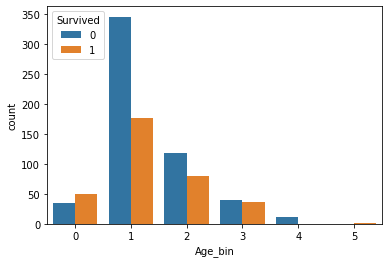

In [19]:

sns.countplot(x = 'Age_bin', hue = 'Survived', data = train_da)

In [20]:
def tarn(k):
    f = 0
    if k == 0:
        f = 1
    elif k == 1:
        f = 0
    
    elif k == 2:
        f = 0
    elif k == 3:
        f = 1
    elif k == 4:
        f = 1
    else:
        f = 1
    return f

train_da['Age_bin'] = train_da['Age_bin'].apply(tarn)

In [21]:
test['Age'] = test['Age'].apply(tarn)

In [22]:
np.unique(test['Age'])

array([0, 1])

In [23]:
np.unique(train_da['Age_bin'])

array([0, 1])

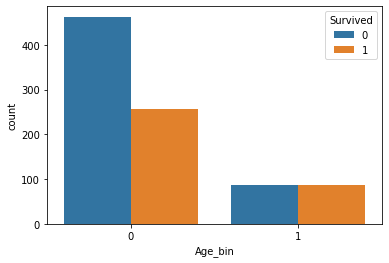

In [24]:
sns.countplot(x = 'Age_bin', hue = 'Survived', data = train_da)

In [25]:
data = train_da.copy()

In [26]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [27]:
data = data.drop('Age', axis= 1)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Age_bin        891 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [29]:
test['Age_bin'] = test['Age']
test = test.drop('Age', axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
Age_bin        418 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 32.8+ KB


In [30]:
test.shape, data.shape

((418, 10), (891, 11))

In [31]:
data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_bin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208,0.193042
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,0.394907
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000


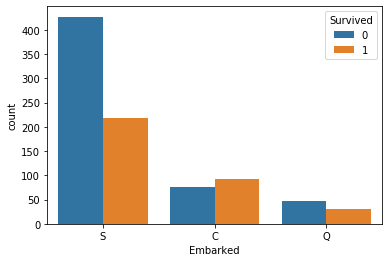

In [32]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = data)

In [33]:
np.unique(data['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [34]:
data['Embarked'][data['Embarked'] == 'S'] = 0
data['Embarked'][data['Embarked'] == 'Q'] = 1
data['Embarked'][data['Embarked'] == 'C'] = 1

/home/odemakinde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/odemakinde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/odemakinde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separat

In [64]:
test['Embarked'][test['Embarked'] == 'S'] = 0
test['Embarked'][test['Embarked'] == 'Q'] = 1
test['Embarked'][test['Embarked'] == 'C'] = 1

/home/odemakinde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/odemakinde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/odemakinde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separat

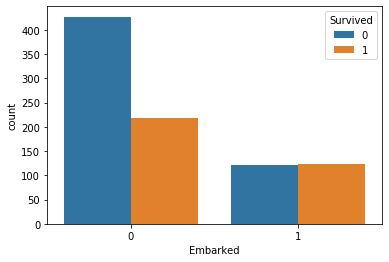

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Embarked', hue = 'Survived', data = data)

# Encodings

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Age_bin'],
      dtype='object')

In [37]:
data_names = data['Name']
data = data.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

data_id = data['PassengerId']
data = data.drop('PassengerId', axis = 1)
test_id = test['PassengerId']
test = test.drop('PassengerId', axis = 1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Age_bin     891 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [39]:
data = data.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)
data = pd.get_dummies(data, columns = ['Sex', 'Age_bin'])
test = pd.get_dummies(test, columns = ['Sex', 'Age_bin'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Age_bin_0     891 non-null uint8
Age_bin_1     891 non-null uint8
dtypes: float64(1), int64(4), object(1), uint8(4)
memory usage: 45.4+ KB


# fare

In [40]:
data['Fare'].mode()[0]

8.05

In [45]:
data.shape, test.shape

((891, 10), (418, 9))

In [74]:
data['Embarked'] = data['Embarked'].astype('int')
test['Embarked'] = test['Embarked'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Age_bin_0     891 non-null uint8
Age_bin_1     891 non-null uint8
dtypes: float64(1), int64(5), uint8(4)
memory usage: 45.4 KB


In [75]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
y = data['Survived']
x = data.drop('Survived', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [77]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

/home/odemakinde/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7991573033707865

In [83]:
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
rand.score(x_train, y_train)

/home/odemakinde/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9185393258426966

In [84]:
pred = rand.predict(x_test)
accuracy_score(y_test, pred)

0.8156424581005587

In [85]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
rand_pred = rand.predict(x_test)
accuracy_score(rand_pred, y_test)

0.8156424581005587

In [86]:
f1_score(rand_pred, y_test)

0.7785234899328859

In [87]:
grad_pred = grad.predict(x_test)
accuracy_score(grad_pred, y_test)

0.7932960893854749

In [88]:
f1_score(grad_pred, y_test)

0.7412587412587412

In [89]:
pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [90]:
classification_report(grad_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.85      0.81      0.83       110\n           1       0.72      0.77      0.74        69\n\n    accuracy                           0.79       179\n   macro avg       0.78      0.79      0.78       179\nweighted avg       0.80      0.79      0.79       179\n'

In [91]:
accuracy_score(pred, y_test)

0.7597765363128491

In [92]:
f1_score(pred, y_test)

0.7074829931972789

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking



models = [GradientBoostingClassifier(),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [94]:
#test['Fare'].mode()

test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [95]:
S_train, S_test = stacking(models,                   
                           x_train, y_train, test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=10, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.83333333]
    fold  1:  [0.83333333]
    fold  2:  [0.76388889]
    fold  3:  [0.86111111]
    fold  4:  [0.81690141]
    fold  5:  [0.83098592]
    fold  6:  [0.81690141]
    fold  7:  [0.81690141]
    fold  8:  [0.85714286]
    fold  9:  [0.77142857]
    ----
    MEAN:     [0.82019282] + [0.03013641]
    FULL:     [0.82022472]

model  1:     [RandomForestClassifier]
    fold  0:  [0.80555556]
    fold  1:  [0.76388889]
    fold  2:  [0.75000000]
    fold  3:  [0.84722222]
    fold  4:  [0.74647887]
    fold  5:  [0.80281690]
    fold  6:  [0.87323944]
    fold  7:  [0.85915493]
    fold  8:  [0.78571429]
    fold  9:  [0.80000000]
    ----
    MEAN:     [0.80340711] + [0.04229489]
    FULL:     [0.80337079]

model  2:     [XGBClassifier]
    fold  0:  [0.86111111]
    fold  1:  [0.81944444]
    fold

In [166]:
model_xgb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=50, max_depth=5)

    
model = model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
print('train score: ', model_xgb.score(x_train, y_train))
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


train score:  0.8820224719101124
Final prediction score: [0.82122905]


In [128]:
model_grb = GradientBoostingClassifier(n_estimators = 60, max_depth = 7)
model = model_grb.fit(x_train, y_train)
y_pred = model_grb.predict(x_test)
print('train score: ', model_grb.score(x_train, y_train))
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


train score:  0.9353932584269663
Final prediction score: [0.81005587]


In [149]:
model_rand = RandomForestClassifier(n_estimators = 50, max_depth = 10)
model = model_rand.fit(x_train, y_train)
y_pred = model_rand.predict(x_test)
print('train score: ', model_rand.score(x_train, y_train))
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


train score:  0.9269662921348315
Final prediction score: [0.84357542]


# my prediction

In [151]:
test.shape, x_train.shape

((418, 9), (712, 9))

In [172]:
prediction= model_grb.predict(test)

In [173]:
len(test_id), len(prediction)

(418, 418)

In [174]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = prediction

In [175]:
frame = pd.DataFrame(frame_dict)
frame.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [176]:
frame.to_csv('my_submission6.csv', index = False)

In [165]:
os.getcwd()

'/home/odemakinde/Desktop/my write ups'

https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e 